**References :**

https://www.kaggle.com/nayuts/hubmap-let-s-visualize-and-understand-dataset

https://www.kaggle.com/kool777/training-hubmap-eda-tf-keras-tpu

# 2. <a id='2'>Summary</a>
[Table of contents](#0.1)

* We are given kidney images (.tiff) (high res) and their corresponding masks either as RLE encoded or unencoded JSON files using which we need to develop segmentation model that identify glomeruli in the PAS stained microscopy data.
* We have 8 train tiff images and 5 test tiff images.
* **Private test set** is larger as compared to **public test set**.
* A **Glomerulus** a tiny ball-shaped structure composed of capillary blood vessels actively involved in the filtration of the blood to form urine. The glomerulus is one of the key structures that make up the nephron, the functional unit of the kidney. [source](https://www.medicinenet.com/glomerulus/definition.htm)
* **Functional Tissue Unit** is defined as a “three-dimensional block of cells centered around a capillary, such that each cell in this block is within diffusion distance from any other cell in the same block”. 
* Images are huge tiff files we need to subsequent data preprocessing. Magnificient notebook [here](https://www.kaggle.com/iafoss/256x256-images) will help.

# 3. <a id='3'>Introduction📔</a>
[Table of contents](#0.1)

Welcome to this new Kaggle competition. The [Human BioMolecular Atlas Program (HuBMAP)](https://hubmapconsortium.org/) is sponsored by The [National Institutes of Health (NIH)](https://www.nih.gov/). The primary task of HuBMAP is to catalyze the development of a framework for mapping the human body at a level of **glomeruli functional tissue units** for the first time in history. Hoping to become one of the world’s largest collaborative biological projects, HuBMAP aims to be an open map of the human body at the cellular level. **This competition, “Hacking the Kidney," starts by mapping the human kidney at single cell resolution.**

"**Your challenge is to detect functional tissue units (FTUs) across different tissue preparation pipelines.**"

Successful submissions will construct the tools, resources, and cell atlases needed to determine how the relationships between cells can affect the health of an individual.

## What is HuBMAP?

The focus of HuBMAP is understanding the intrinsic intra-, inter-, and extra- cellular biomolecular distribution in human tissue. HuBMAP will focus on fresh, fixed, or frozen healthy human tissue using in situ and dissociative techniques that have high-spatial resolution.

The Human BioMolecular Atlas Program is a consortium composed of diverse research teams funded by the [Common Fund at the National Institutes of Health](https://commonfund.nih.gov/HuBMAP) . HuBMAP values secure, open sharing, and collaboration with other consortia and the wider research community.

HuBMAP is developing the tools to create an open, global atlas of the human body at the cellular level. These tools and maps will be openly available, to accelerate understanding of the relationships between cell and tissue organization and function and human health.

## What is FTU?

An FTU is defined as a “three-dimensional block of cells centered around a capillary, such that each cell in this block is within diffusion distance from any other cell in the same block” (de Bono, 2013). 

The glomerulus (plural glomeruli) is a network of small blood vessels (capillaries) known as a tuft, located at the beginning of a nephron in the kidney. The tuft is structurally supported by the mesangium (the space between the blood vessels), composed of intraglomerular mesangial cells. The blood is filtered across the capillary walls of this tuft through the glomerular filtration barrier, which yields its filtrate of water and soluble substances to a cup-like sac known as Bowman's capsule. 

<br>

<div style="clear:both;display:table">
<img src="https://ohiostate.pressbooks.pub/app/uploads/sites/36/h5p/content/37/images/file-599206597bdbc.jpg" style="width:45%;float:left"/>
<img src="https://cdn.kastatic.org/ka-perseus-images/0e7bfc98302c3e45dc7ec73ab142566a57513ec3.svg" style="width:45%;float:left"/>
</div>

<br>

## Competition Goal (Brief)

* The goal of this competition is the implementation of a successful and robust glomeruli FTU detector. Develop segmentation algorithms that identify **"Glomerulus"** in the PAS stained microscopy data. Detect functional tissue units (FTUs) across different tissue preparation pipelines.

* For each image we are given annotations in separate JSON file and also the annotations are RLE encoded in train.csv.

* We are segmenting **glomeruli FTU** in each image.

* Since this is segmentation task our evaluation metric is Dice Coefficient. The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth.

## About Competition Data

The data is huge **(24.5 GB)**. The HuBMAP data used in this hackathon includes 11 fresh frozen and 9 Formalin Fixed Paraffin Embedded (FFPE) PAS kidney images. Stained microscopy employs histological stains such as H&E or PAS to improve resolution and contrast for visualization of anatomical structures such as tubules or glomeruli. Glomeruli FTU annotations exist for all 20 tissue samples. Some of these will be shared for training, and others will be used to judge submissions.

* The dataset is comprised of very large (>500MB - 5GB) TIFF files. 
* **"The training set"** has 8, and the public test set has 5 tiff files respectively. 
* **"The private test set"** is larger than the public test set.
* The training set includes annotations in both RLE-encoded and unencoded (JSON) forms. The annotations denote segmentations of glomeruli.

* **Both the training and public test sets also include anatomical structure segmentations. They are intended to help you identify the various parts of the tissue.**

We are provided with following files:

* For each of the 11 training images we have been provided with a JSON file. Each JSON file has:
   * A type (Feature) and object type id (PathAnnotationObject). Note that these fields are the same between all files and do not offer signal.
   * A geometry containing a Polygon with coordinates for the feature's enclosing volume
   * Additional properties, including the name and color of the feature in the image.
   * The IsLocked field is the same across file types (locked for glomerulus, unlocked for anatomical structure) and is not signal-bearing.

* train.csv contains the unique IDs for each image, as well as an RLE-encoded representation of the mask for the objects in the image. See the evaluation tab for details of the RLE encoding scheme. Note that we are also given annotations in JSON file for each image.

* HuBMAP-20-dataset_information.csv contains additional information (including anonymized patient data) about each image.

## What is RLE?

Run-length encoding (RLE) is a form of lossless data compression in which runs of data (sequences in which the same data value occurs in many consecutive data elements) are stored as a single data value and count, rather than as the original run.

## What we are prediciting?

Participants will develop segmentation algorithm that identify **"glomeruli "** in the PAS stained microscopy data. Detect functional tissue units (FTUs) across different tissue preparation pipelines. Participants are welcome to use other external data and/or pre-trained machine learning models in support of FTU segmentation. 

**We need to segment glomeruli in very large resolution Kidney images and annotations which are availabel as RLE encoded and as well as a JSON format.**

## Evaluation Metric: Dice Coefficient

Dice Coefficient is common in case our task involve **segmentation**. The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth. the Dice similarity coefficient for two sets X and Y is defined as:

$$\text{DC}(X, Y) = \frac{2 \times |X \cap Y|}{|X| + |Y|}.$$

where X is the predicted set of pixels and Y is the ground truth.

In [ ]:
import collections
import json
import os
import uuid

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw, ImageFilter
import tifffile as tiff 
import seaborn as sns

In [ ]:
!ls ../input/hubmap-kidney-segmentation/

HuBMAP-20-dataset_information.csv  test   train.csv
sample_submission.csv		   train


In [ ]:
train = pd.read_csv("../input/hubmap-kidney-segmentation/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        15 non-null     object
 1   encoding  15 non-null     object
dtypes: object(2)
memory usage: 368.0+ bytes


In [ ]:
metadata = pd.read_csv("../input/hubmap-kidney-segmentation/HuBMAP-20-dataset_information.csv")
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   image_file                             20 non-null     object 
 1   width_pixels                           20 non-null     int64  
 2   height_pixels                          20 non-null     int64  
 3   anatomical_structures_segmention_file  20 non-null     object 
 4   glomerulus_segmentation_file           20 non-null     object 
 5   patient_number                         20 non-null     int64  
 6   race                                   20 non-null     object 
 7   ethnicity                              20 non-null     object 
 8   sex                                    20 non-null     object 
 9   age                                    20 non-null     int64  
 10  weight_kilograms                       19 non-null     float64
 11  height_c

In [ ]:
samplesubmission = pd.read_csv("../input/hubmap-kidney-segmentation/sample_submission.csv")
samplesubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5 non-null      object 
 1   predicted  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
img_id_1 = "aaa6a05cc"
image_1 = tiff.imread('../input/hubmap-kidney-segmentation/train/' + img_id_1 + ".tiff")
print("This image's id:", img_id_1)
image_1.shape

This image's id: aaa6a05cc


(18484, 13013, 3)

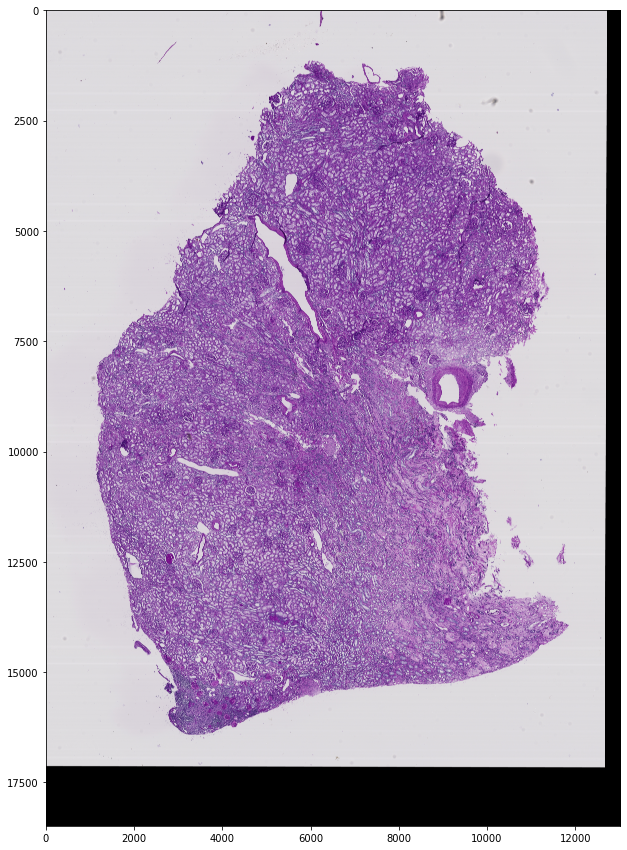

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(image_1)

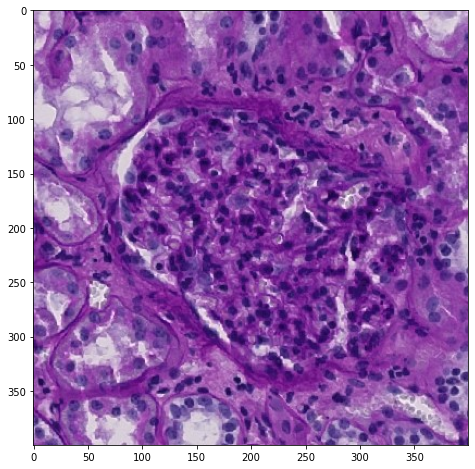

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(image_1[5200:5600, 5600:6000, :])

In [ ]:
img_id_4 = "e79de561c"
image_4 = tiff.imread('../input/hubmap-kidney-segmentation/train/' + img_id_4 + ".tiff")
print("This image's id:", img_id_4)
image_4.shape

This image's id: e79de561c


(1, 1, 3, 16180, 27020)

In [ ]:
image_4 = image_4[0][0].transpose(1, 2, 0)
image_4.shape

(16180, 27020, 3)

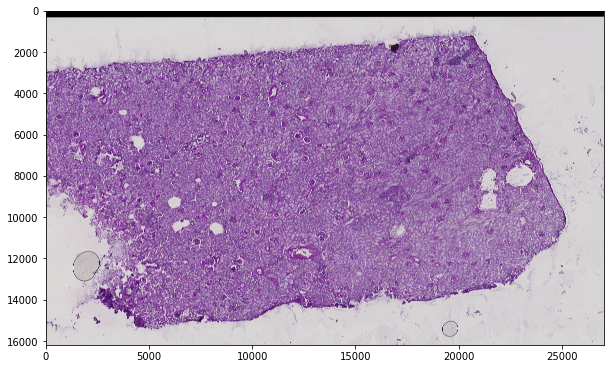

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_4)

In [ ]:
mask_rle = train[train["id"]==img_id_1]["encoding"].iloc[-1]

In [ ]:
s = mask_rle.split()

In [ ]:
shape=((image_1.shape[1], image_1.shape[0]))

In [ ]:
 starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]

In [ ]:
starts -= 1
ends = starts + lengths
img = np.zeros(shape[0]*shape[1], dtype=np.uint8)

In [ ]:
for lo, hi in zip(starts, ends):
    img[lo:hi] = 1
    image_reshaped = img.reshape(shape).T

In [ ]:
image_reshaped.shape

(18484, 13013)

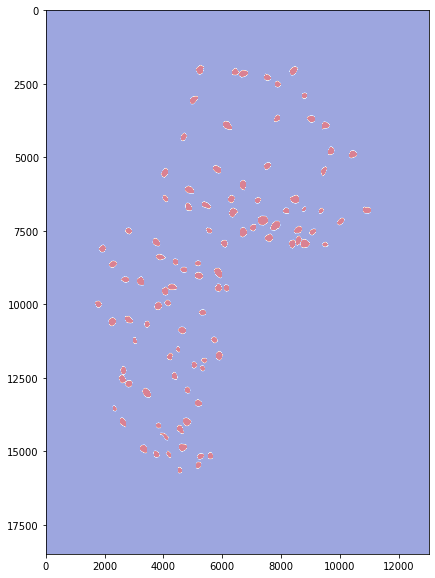

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_reshaped, cmap='coolwarm', alpha=0.5)

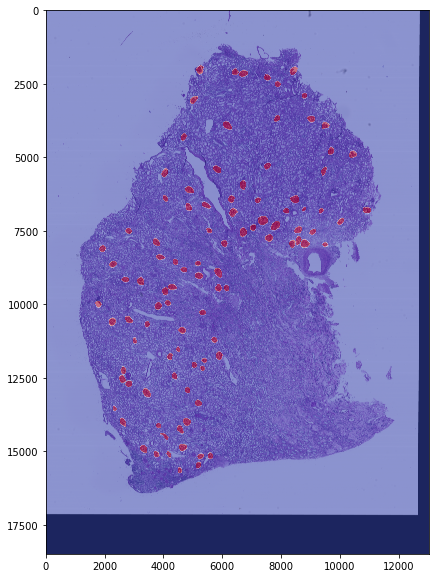

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_1)
plt.imshow(image_reshaped, cmap='coolwarm', alpha=0.5)

In [ ]:
with open("../input/hubmap-kidney-segmentation/train/e79de561c.json") as f:
    e79de561c_json = json.load(f)
    
print("lenght of json:", len(e79de561c_json))
print(e79de561c_json[0])

lenght of json: 180
{'type': 'Feature', 'id': 'PathAnnotationObject', 'geometry': {'type': 'Polygon', 'coordinates': [[[19596, 5511], [19551, 5522], [19538, 5535], [19538, 5536], [19537, 5536], [19520, 5556], [19490, 5640], [19472, 5681], [19472, 5693], [19469, 5702], [19470, 5788], [19472, 5797], [19473, 5799], [19486, 5842], [19509, 5912], [19513, 5922], [19549, 5941], [19550, 5942], [19550, 5941], [19552, 5943], [19566, 5937], [19656, 5915], [19662, 5903], [19673, 5900], [19743, 5774], [19742, 5772], [19744, 5771], [19742, 5757], [19737, 5647], [19725, 5630], [19724, 5622], [19682, 5571], [19659, 5539], [19653, 5535], [19645, 5526], [19621, 5518], [19618, 5517], [19616, 5517], [19596, 5511]]]}, 'properties': {'classification': {'name': 'glomerulus', 'colorRGB': -2315298}, 'isLocked': False, 'measurements': []}}


In [ ]:
def flatten(l):
    for el in l:
        if isinstance(el, collections.abc.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

def draw_structure(structures, im):
    """
    anatomical_structure: list of points of anatomical_structure poligon.
    im: numpy array of image read from tiff file.
    """
    
    im = Image.fromarray(im)
    draw = ImageDraw.Draw(im)
    for structure in structures:
        structure_flatten = list(flatten(structure["geometry"]["coordinates"][0]))
        structure = []
        for i in range(0, len(structure_flatten), 2):
            structure.append(tuple(structure_flatten[i:i+2]))
        
        draw.line(structure, width=100, fill='Red')
    return im

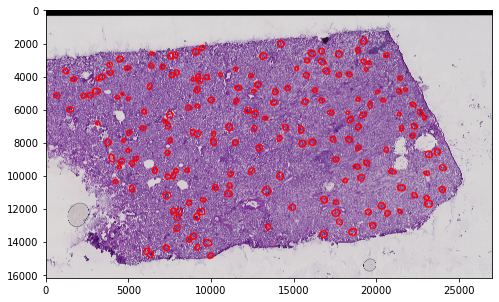

In [ ]:
plt.figure(figsize=(8,8))
image_4_with_line = draw_structure(e79de561c_json, image_4)
plt.imshow(image_4_with_line)

In [ ]:
with open(f"../input/hubmap-kidney-segmentation/train/{img_id_1}-anatomical-structure.json") as f:
    anatomical_structure_json = json.load(f)
    
anatomical_structure_json

[{'type': 'Feature',
  'id': 'PathAnnotationObject',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[7632, 7940],
     [6147, 9668],
     [6147, 11072],
     [6147, 11088],
     [6163, 11104],
     [6179, 11169],
     [6632, 12380],
     [6632, 12396],
     [6648, 13720],
     [6648, 13736],
     [6632, 13752],
     [6228, 15205],
     [6309, 15479],
     [6777, 15592],
     [10119, 15447],
     [10135, 15447],
     [11507, 14543],
     [11539, 14527],
     [11604, 14495],
     [12008, 14220],
     [11927, 13784],
     [11265, 13494],
     [11249, 13494],
     [10587, 13316],
     [10490, 12315],
     [10490, 12299],
     [10490, 12267],
     [10490, 12218],
     [10054, 10184],
     [10038, 10136],
     [10022, 10071],
     [9925, 9151],
     [9860, 9006],
     [8666, 9232],
     [7632, 7940]]]},
  'properties': {'classification': {'name': 'Medulla', 'colorRGB': -65536},
   'isLocked': False,
   'measurements': []}},
 {'type': 'Feature',
  'id': 'PathAnnotationObject',
  'geome

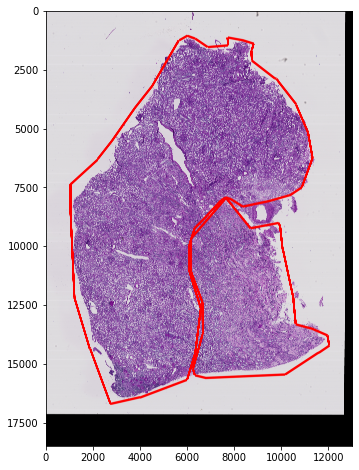

In [ ]:
plt.figure(figsize=(8,8))
image_1_with_line = draw_structure(anatomical_structure_json, image_1)
plt.imshow(image_1_with_line)

In [ ]:
metadata.head()

,image_file,width_pixels,height_pixels,anatomical_structures_segmention_file,glomerulus_segmentation_file,patient_number,race,ethnicity,sex,age,weight_kilograms,height_centimeters,bmi_kg/m^2,laterality,percent_cortex,percent_medulla
0,aa05346ff.tiff,47340,30720,aa05346ff-anatomical-structure.json,aa05346ff.json,67347,White,Not Hispanic or Latino,Female,58,59.0,160.0,23.0,Right,80,20
1,afa5e8098.tiff,43780,36800,afa5e8098-anatomical-structure.json,afa5e8098.json,67347,White,Not Hispanic or Latino,Female,58,59.0,160.0,23.0,Right,55,45
2,54f2eec69.tiff,22240,30440,54f2eec69-anatomical-structure.json,54f2eec69.json,67548,Black or African American,Not Hispanic or Latino,Male,58,79.9,190.5,22.0,Right,75,25
3,d488c759a.tiff,29020,46660,d488c759a-anatomical-structure.json,d488c759a.json,68138,White,Not Hispanic or Latino,Female,66,81.5,158.8,32.2,Left,100,0
4,1e2425f28.tiff,32220,26780,1e2425f28-anatomical-structure.json,1e2425f28.json,63921,White,Not Hispanic or Latino,Male,48,131.5,193.0,35.3,Right,65,35


In [ ]:
metadata.shape

(20, 16)

In [ ]:
ds_info = metadata

In [ ]:
def train_or_test(image_file):
    id, _ = image_file.split(".")
    if id in list(train["id"]):
        return "train"
    else:
        return "test"
    
ds_info["category"] = ds_info["image_file"].map(train_or_test)


In [ ]:
plt.style.use("Solarize_Light2")

Text(0.5, 1.0, 'Number of images per patient')

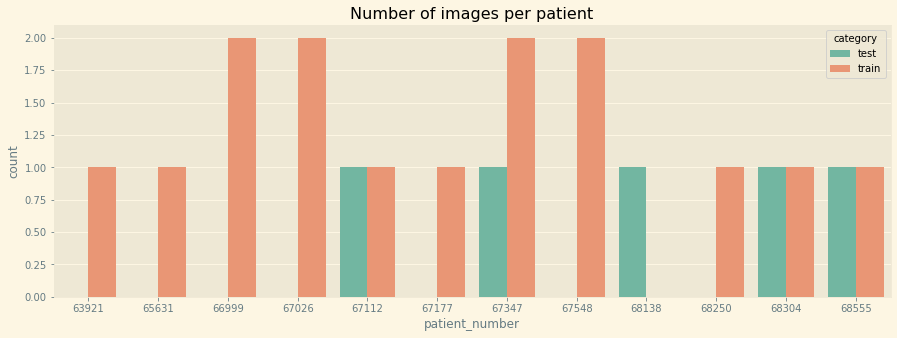

In [ ]:
plt.figure(figsize=(15, 5))
g = sns.countplot(data=ds_info, x="patient_number", hue="category", palette=sns.color_palette("Set2", 8))
g.set_title("Number of images per patient")

Text(0.5, 1.0, 'distribution of ethnicity')

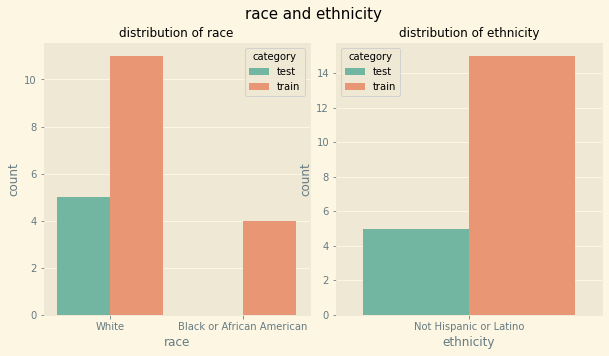

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), gridspec_kw=dict(wspace=0.1, hspace=0.6))
fig.suptitle("race and ethnicity", fontsize=15)
g = sns.countplot(data=ds_info, x="race", hue="category", palette=sns.color_palette("Set2", 8),ax=axes[0])
g.set_title("distribution of race", fontsize=12)
g = sns.countplot(data=ds_info, x="ethnicity", palette=sns.color_palette("Set2", 8), hue="category",ax=axes[1])
g.set_title("distribution of ethnicity", fontsize=12)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of age for test')

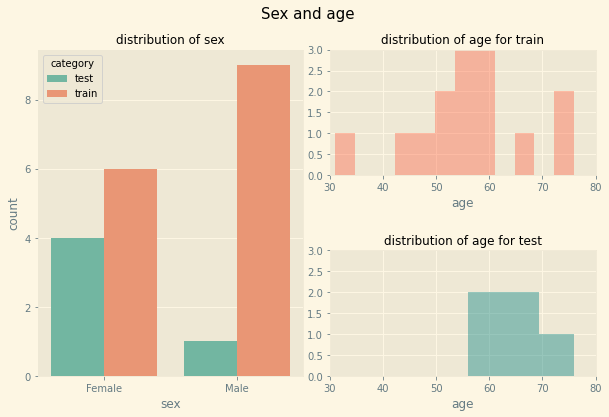

In [ ]:
#Create figure and Axes. And set title.
fig, axes = plt.subplots(2, 2, figsize=(10,6), gridspec_kw=dict(wspace=0.1, hspace=0.6))
fig.suptitle("Sex and age", fontsize=15)

#Too check layout, I'll show text on each Axes.
gs = axes[0, 1].get_gridspec()
axes[0, 0].remove()
axes[1, 0].remove()
#Add gridspec we got
axbig = fig.add_subplot(gs[:, 0])

g = sns.countplot(data=ds_info, x="sex", hue="category", palette=sns.color_palette("Set2", 8),ax=axbig)
g.set_title("distribution of sex", fontsize=12)

#Add three plots.
g = sns.distplot(ds_info[ds_info["category"]=="train"]["age"], color="tomato", kde=False, rug=False,ax=axes[0,1])
g.set(xlim=(30,80))
g.set(ylim=(0,3))
g.set_title("distribution of age for train", fontsize=12)

g = sns.distplot(ds_info[ds_info["category"]=="test"]["age"], color="teal", kde=False, rug=False, ax=axes[1,1])
g.set(xlim=(30,80))
g.set(ylim=(0,3))
g.set_title("distribution of age for test", fontsize=12)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'laterality')

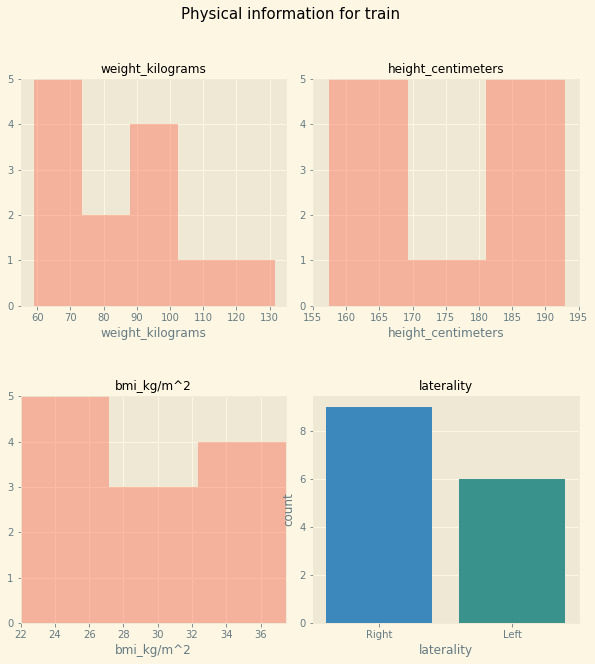

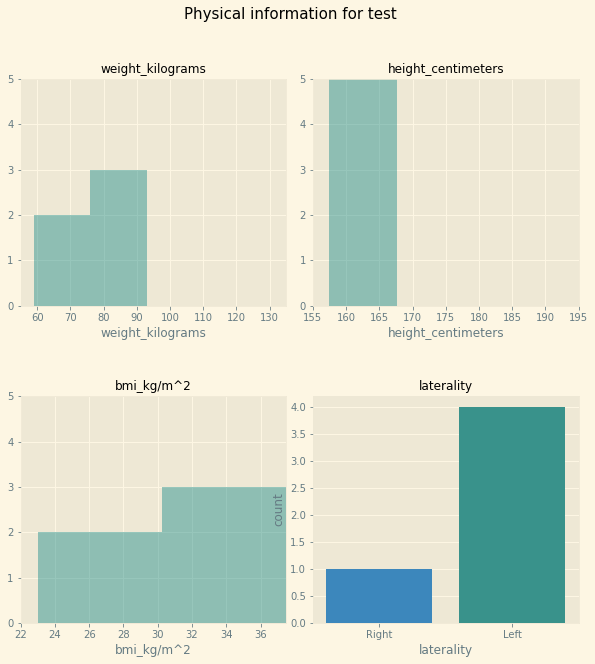

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10), gridspec_kw=dict(wspace=0.1, hspace=0.4))
fig.suptitle("Physical information for train", fontsize=15)


g = sns.distplot(ds_info[ds_info["category"]=="train"]["weight_kilograms"], color="tomato", kde=False, rug=False, ax=axes[0,0])
g.set(xlim=(55,135))
g.set(ylim=(0,5))
g.set_title("weight_kilograms", fontsize=12)

g = sns.distplot(ds_info[ds_info["category"]=="train"]["height_centimeters"], color="tomato", kde=False, rug=False, ax=axes[0,1])
g.set(xlim=(155,195))
g.set(ylim=(0,5))
g.set_title("height_centimeters", fontsize=12)

g = sns.distplot(ds_info[ds_info["category"]=="train"]["bmi_kg/m^2"], color="tomato", kde=False, rug=False, ax=axes[1,0])
g.set(xlim=(22,37.5))
g.set(ylim=(0,5))
g.set_title("bmi_kg/m^2", fontsize=12)

g = sns.countplot(ds_info[ds_info["category"]=="train"]["laterality"], ax=axes[1,1])
g.set_title("laterality", fontsize=12)


fig, axes = plt.subplots(2, 2, figsize=(10,10), gridspec_kw=dict(wspace=0.1, hspace=0.4))
fig.suptitle("Physical information for test", fontsize=15)


g = sns.distplot(ds_info[ds_info["category"]=="test"]["weight_kilograms"], color="teal", kde=False, rug=False, ax=axes[0,0])
g.set(xlim=(55,135))
g.set(ylim=(0,5))
g.set_title("weight_kilograms", fontsize=12)

g = sns.distplot(ds_info[ds_info["category"]=="test"]["height_centimeters"], color="teal", kde=False, rug=False, ax=axes[0,1])
g.set(xlim=(155,195))
g.set(ylim=(0,5))
g.set_title("height_centimeters", fontsize=12)

g = sns.distplot(ds_info[ds_info["category"]=="test"]["bmi_kg/m^2"], color="teal", kde=False, rug=False, ax=axes[1,0])
g.set(xlim=(22,37.5))
g.set(ylim=(0,5))
g.set_title("bmi_kg/m^2", fontsize=12)

g = sns.countplot(ds_info[ds_info["category"]=="test"]["laterality"], ax=axes[1,1])
g.set_title("laterality", fontsize=12)


In [ ]:
ds_info["Ratio_of_medulla_to_cortex"] = ds_info["percent_medulla"] / ds_info["percent_cortex"] 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'test')

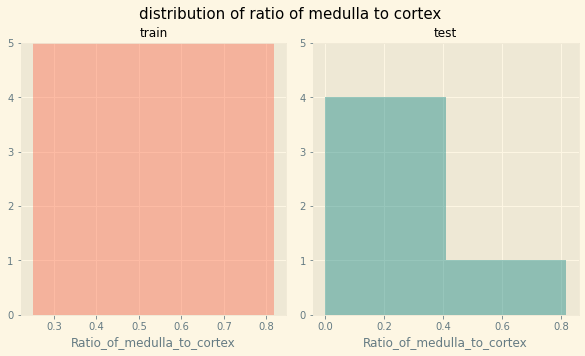

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), gridspec_kw=dict(wspace=0.1, hspace=0.6))
fig.suptitle("distribution of ratio of medulla to cortex", fontsize=15)
g = sns.distplot(ds_info[ds_info["category"]=="train"]["Ratio_of_medulla_to_cortex"], color="tomato",kde=False, rug=False, ax=axes[0])
g.set(ylim=(0,5))
g.set_title("train", fontsize=12)
g = sns.distplot(ds_info[ds_info["category"]=="test"]["Ratio_of_medulla_to_cortex"], color="teal", kde=False, rug=False, ax=axes[1])
g.set(ylim=(0,5))
g.set_title("test", fontsize=12)